Vehicle Detection

This will be used to create imagery for the writeup

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
%matplotlib inline
from scipy.ndimage.measurements import label

import vehicledetect

1. Explain how (and identify where in your code) you extracted HOG features from the training images.

I started by reading in all the vehicle and non-vehicle images. Here is an example of one of each of the vehicle and non-vehicle classes:

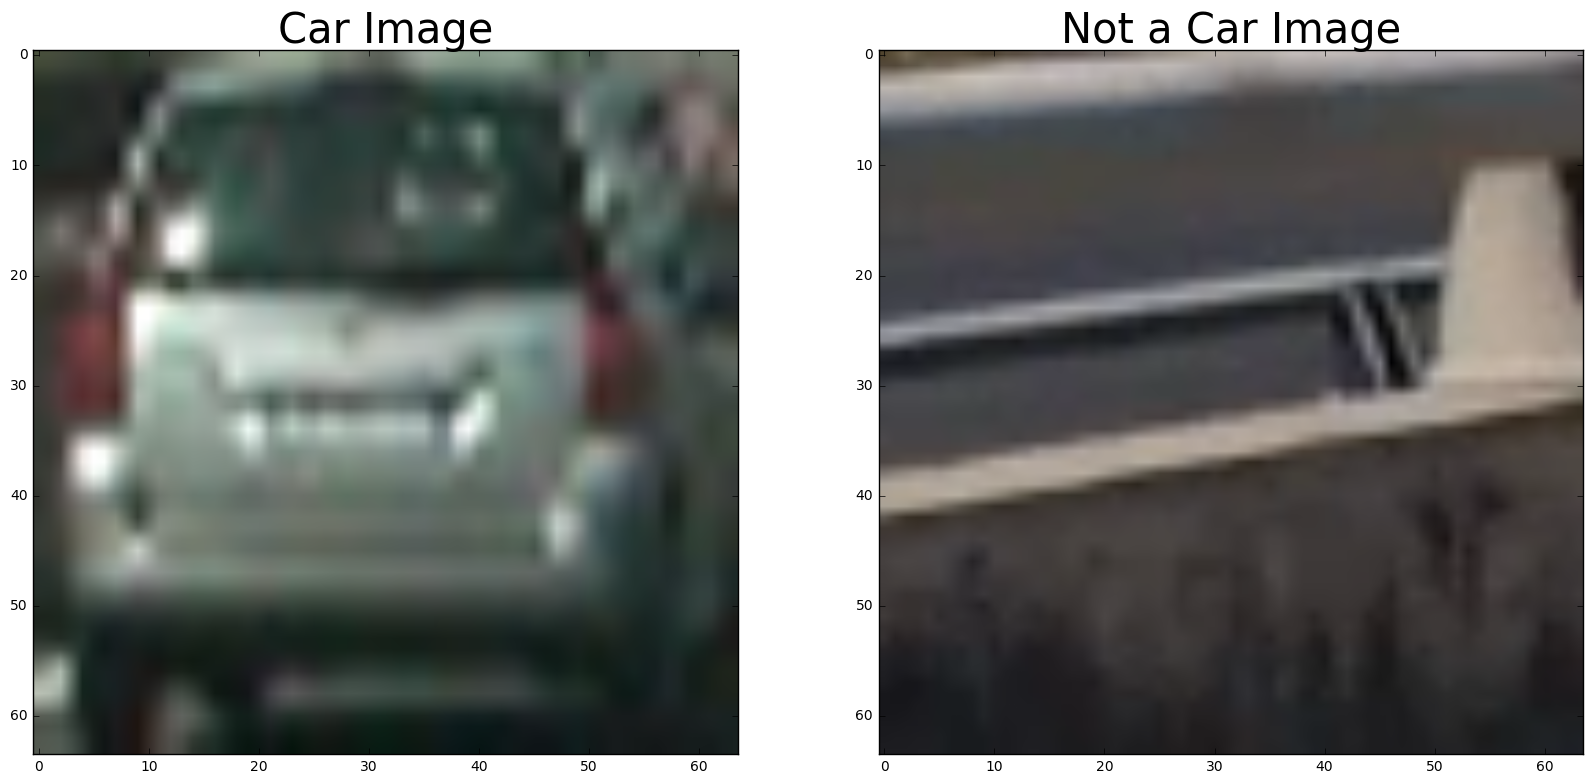

In [2]:
cars = glob.glob('vehicles/*/*.png')
notcars = glob.glob('non-vehicles/*/*.png')
car_img = mpimg.imread(cars[0])
notcar_img = mpimg.imread(notcars[0])
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(car_img)
ax1.set_title('Car Image', fontsize=30)
ax2.imshow(notcar_img)
ax2.set_title('Not a Car Image', fontsize=30)

Test Accuracy of SVC =  0.9907
(64, 64, 3)
YCrCb


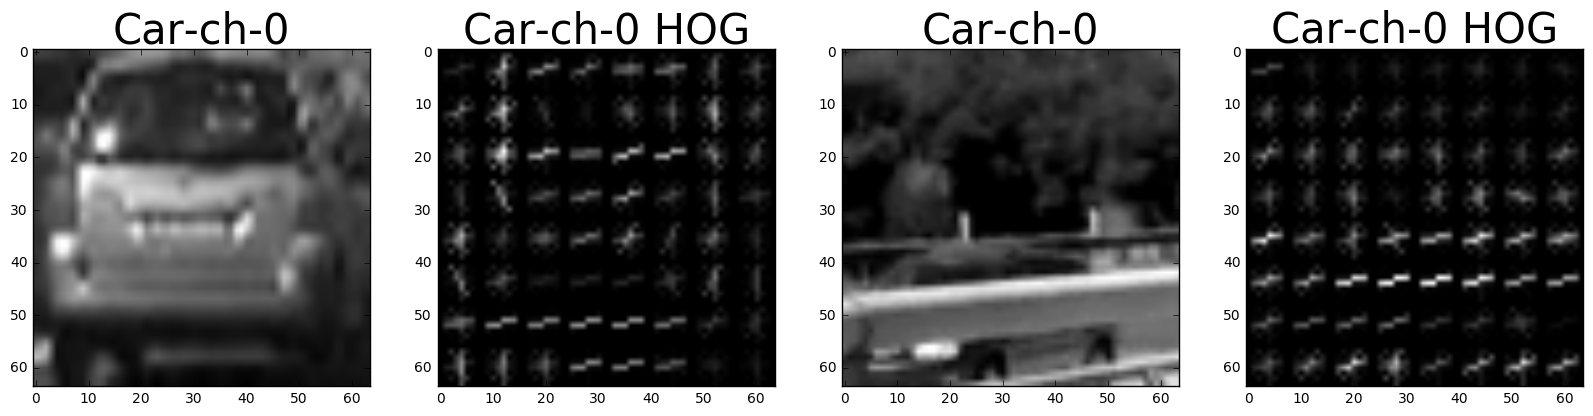

(64, 64, 3)
YCrCb


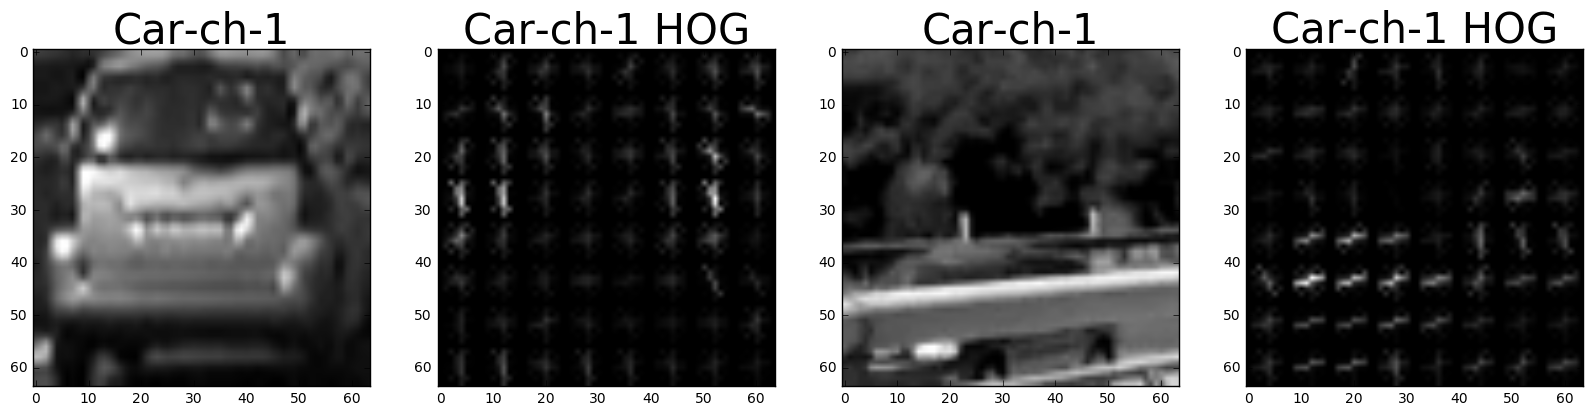

(64, 64, 3)
YCrCb


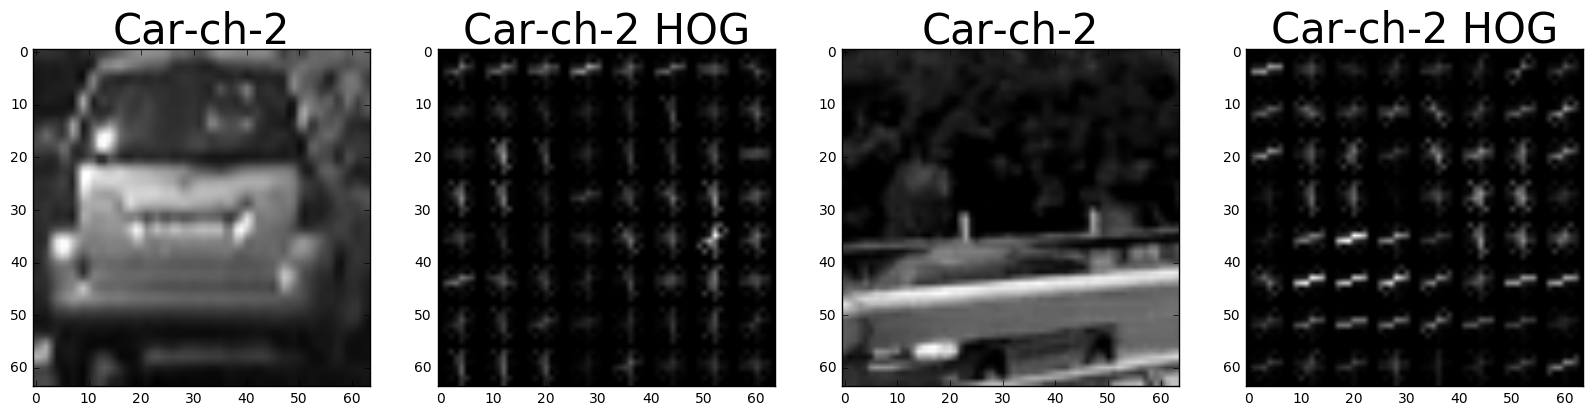

In [3]:

        

dist_pickle = vehicledetect.loadModelPickle()
svc = dist_pickle["svc"]
X_scaler = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]
color_space = dist_pickle["color_space"]
accuracy_score = dist_pickle["accuracy_score"]
print('Test Accuracy of SVC = ', round(accuracy_score, 4))

#0.9809
if True:
        if False:
            color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
            orient = 9  # HOG orientations
            pix_per_cell = 8 # HOG pixels per cell
            cell_per_block = 2 # HOG cells per block
            hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
            spatial_size = (16, 16) # Spatial binning dimensions
            hist_bins = 16    # Number of histogram bins
            spatial_feat = True # Spatial features on or off
            hist_feat = True # Histogram features on or off
            hog_feat = True # HOG features on or off

            
        car_img = mpimg.imread(cars[0])
        notcar_img = mpimg.imread(notcars[500])

        if True:
          for channel in range(0,3):
            print(car_img.shape)
            print(color_space)
            fi=vehicledetect.convert_color(car_img,color_space)
            feat,img = vehicledetect.get_hog_features(fi[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=True, feature_vec=True)
            f, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))
            ax1.imshow(car_img[:,:,channel],cmap='gray')
            ax1.set_title('Car-ch-'+str(channel)+'', fontsize=30)
            ax2.imshow(img,cmap='gray')
            nfi=vehicledetect.convert_color(notcar_img,color_space)
            feat,img = vehicledetect.get_hog_features(nfi[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=True, feature_vec=True)
            ax2.set_title('Car-ch-'+str(channel)+' HOG', fontsize=30)
            ax3.imshow(notcar_img[:,:,channel],cmap='gray')
            ax3.set_title('Car-ch-'+str(channel)+'', fontsize=30)
            ax4.imshow(img,cmap='gray')
            ax4.set_title('Car-ch-'+str(channel)+' HOG', fontsize=30)
            plt.show()
            
        #plt.imshow(img,cmap='gray')
        #plt.show()
        #plt.imshow(car_img)
        #plt.show()
        #plt.imshow(car_img[:,:,0],cmap='gray')
        #plt.show()
        #plt.imshow(car_img[:,:,1],cmap='gray')
        #plt.show()
        #plt.imshow(car_img[:,:,2],cmap='gray')
        #plt.show()

        #plt.imshow(fi)
        #plt.show()
        #plt.imshow(nfi)
        #plt.show()
        #feature_image = np.copy(car_img)
        #plt.imshow(feature_image)
        #plt.show()

Test Accuracy of SVC =  0.9907


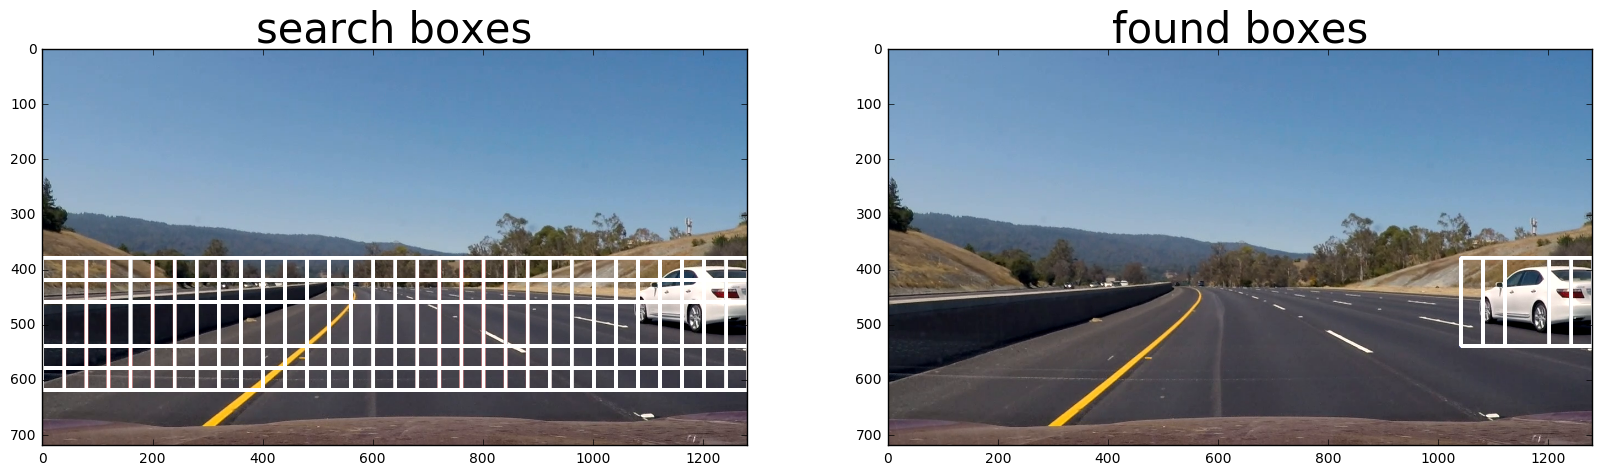

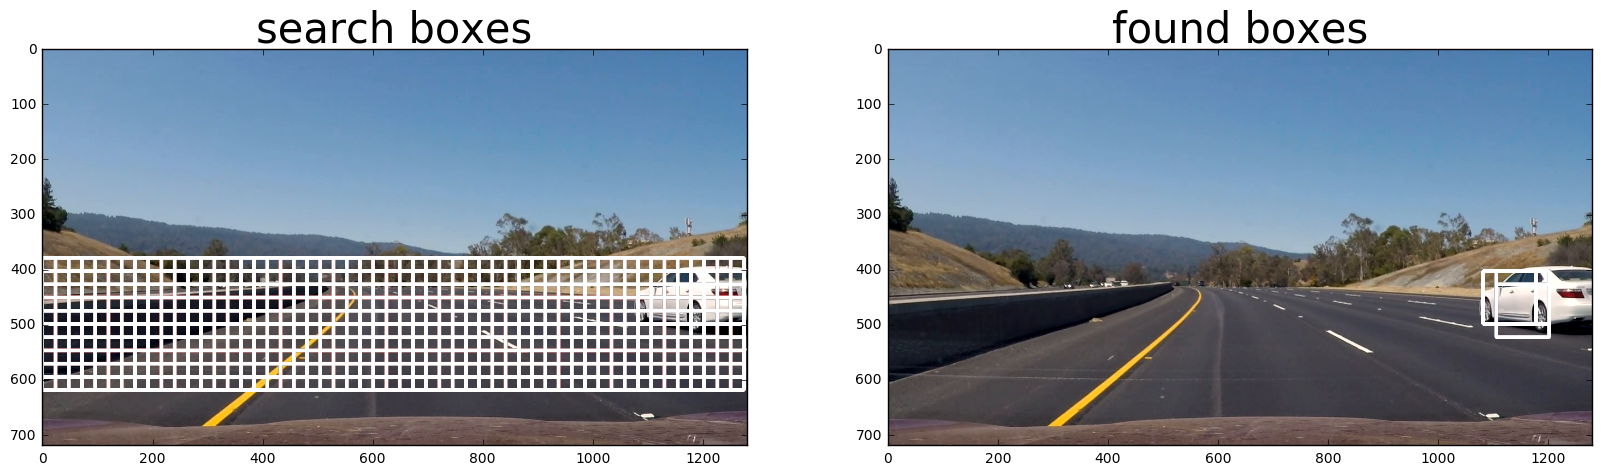

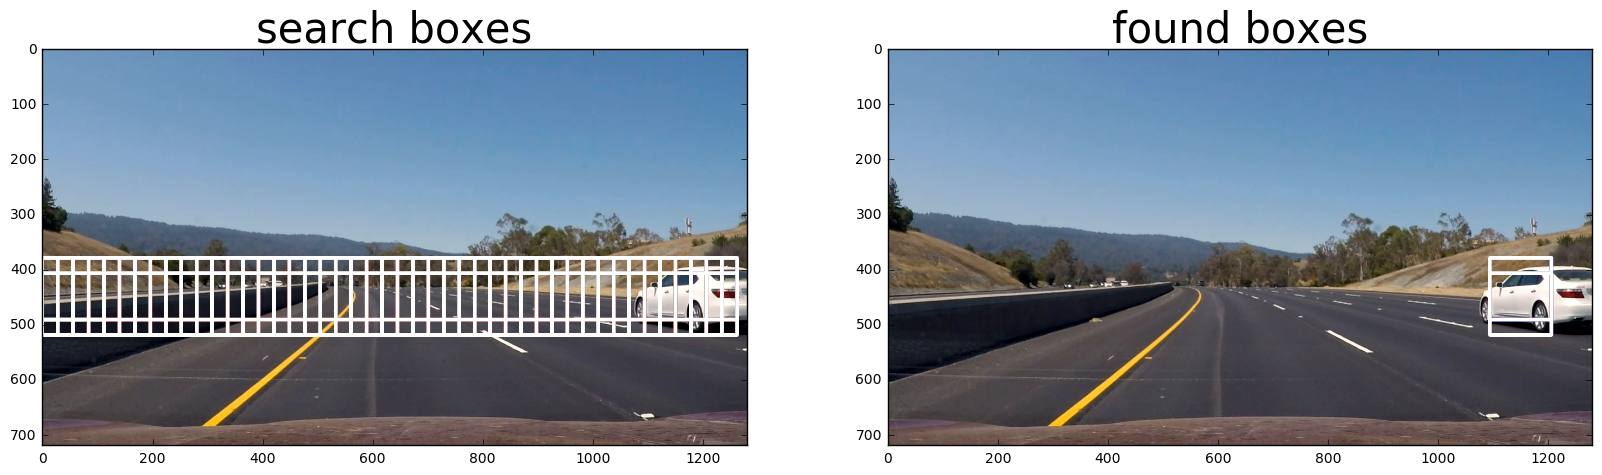

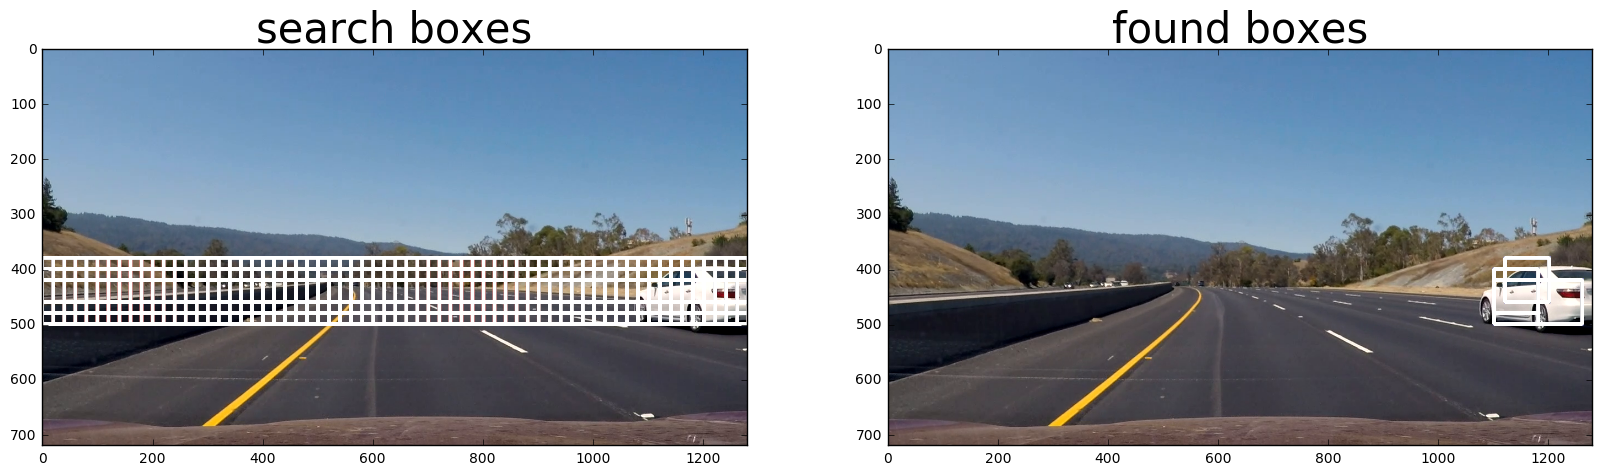

decision: [ 0.02073586]   pc: 0.0766796875 *


decision: [ 1.59710732] *  pc: 0.0787109375 *


decision: [ 0.18524405]   pc: 0.0762109375 *


decision: [ 1.107924] *  pc: 0.09222412109375 *


decision: [ 2.39554123] *  pc: 0.11480034722222222 *


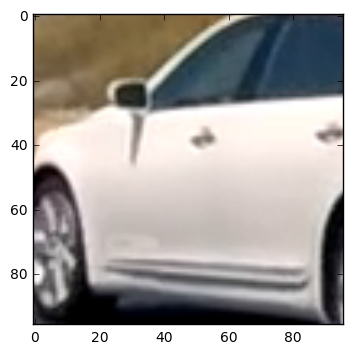

decision: [ 1.75250207] *  pc: 0.11414930555555555 *


decision: [ 0.20805881]   pc: 0.11024305555555555 *


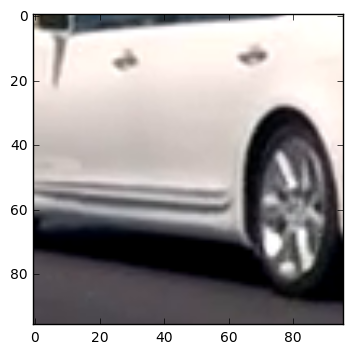

decision: [ 0.84949432] *  pc: 0.08506058673469388 *


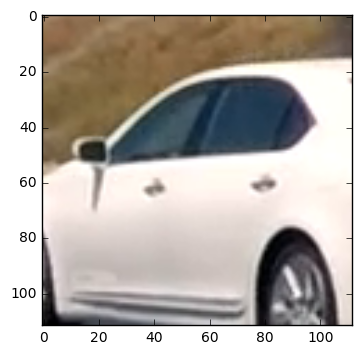

decision: [ 2.19851487] *  pc: 0.10307716836734694 *


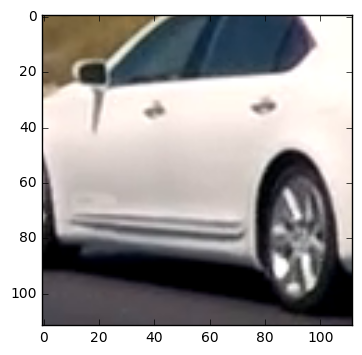

decision: [ 0.19172677]   pc: 0.0659375 *


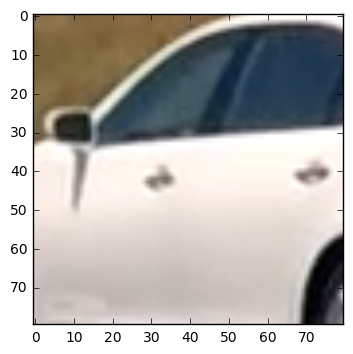

decision: [ 0.1090709]   pc: 0.10875 *


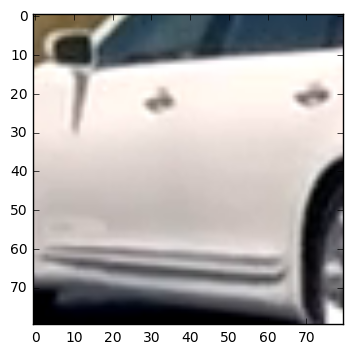

decision: [ 0.52282608]   pc: 0.05796875 


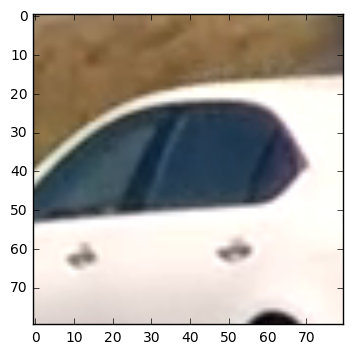

decision: [ 0.01889687]   pc: 0.0965625 *


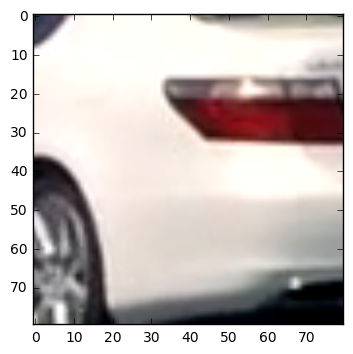

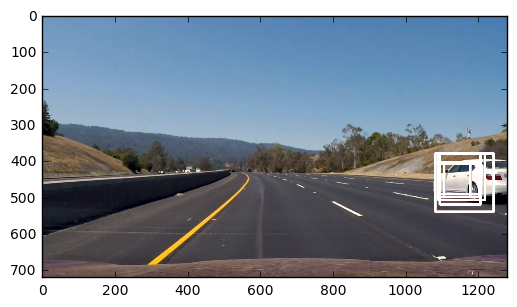

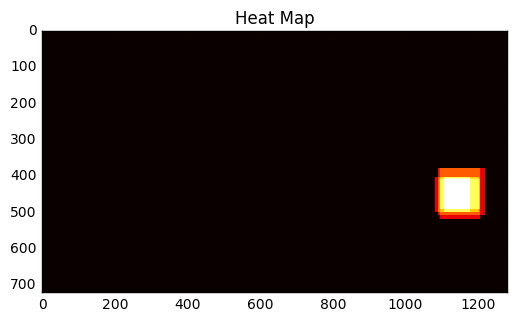

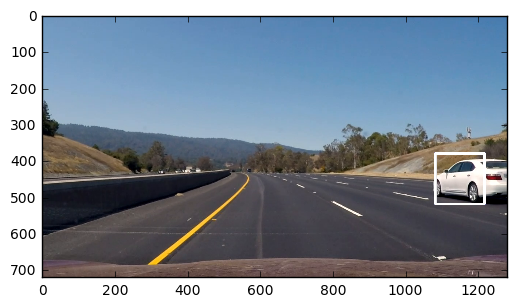

In [11]:
    dist_pickle = vehicledetect.loadModelPickle()
    svc = dist_pickle["svc"]
    X_scaler = dist_pickle["scaler"]
    orient = dist_pickle["orient"]
    pix_per_cell = dist_pickle["pix_per_cell"]
    cell_per_block = dist_pickle["cell_per_block"]
    spatial_size = dist_pickle["spatial_size"]
    hist_bins = dist_pickle["hist_bins"]
    color_space = dist_pickle["color_space"]
    accuracy_score = dist_pickle["accuracy_score"]
    print('Test Accuracy of SVC = ', round(accuracy_score, 4))
    
    #test_images = ["output_images/proj"+str(560)+".png"]
    test_images = ["output_images/proj"+str(680)+".png"]    # GOOD DEBUG OUTPUT
    test_images = ["output_images/proj"+str(200)+".png"]
    #test_images = ['test_images/test5.jpg']
    image = mpimg.imread(test_images[0])
    if (image.dtype=='float32'):
        image = (image * 255).round().astype(np.uint8)

    find_car_params=vehicledetect.getWindowParameters()

    box_list=[]
    dec_list=[]
    debug_boxes=[]
    for fcp in find_car_params:
       fcp["out_img"], fcp["box_list"],fcp["decision_list"],fcp["debug_boxes"] = vehicledetect.find_cars(image, fcp["ystart"],fcp["yend"],fcp["scale"], svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins,color_space)
       box_list = box_list + fcp["box_list"]
       debug_boxes = debug_boxes + fcp["debug_boxes"]
       dec_list = dec_list+ fcp["decision_list"]
    #print(debug_boxes)
    
    for fcp in find_car_params:
        debug_box=fcp["debug_boxes"]
        debug_image=np.copy(image)
        vehicledetect.draw_bboxes(debug_image,debug_box,box_color=(255,0,0))
        cv2.rectangle(debug_image, debug_box[0][0], debug_box[0][1], (255,255,255), 6)
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
        ax1.imshow(debug_image)
        ax1.set_title('search boxes', fontsize=30)
        out_img=fcp["out_img"]
        ax2.imshow(out_img)
        ax2.set_title('found boxes', fontsize=30)
        plt.show()

    debug_image=np.copy(image)
    vehicledetect.draw_bboxes(debug_image,box_list)
    plt.imshow(debug_image)
    plt.show()

    
    box_list_trunc=vehicledetect.rejectFrames(image,box_list,dec_list,True)
    
    debug_image=np.copy(image)
    vehicledetect.draw_bboxes(debug_image,box_list_trunc)
    plt.imshow(debug_image)
    plt.show()
    
    
    #print(box_list)
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = vehicledetect.add_heat(heat,box_list_trunc)
    # Apply threshold to help remove false positives
    heat = vehicledetect.apply_threshold(heat,1)
    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)
    labels = label(heatmap)
    plt.imshow(heatmap, cmap='hot')
    plt.title('Heat Map')
    plt.show()
    draw_img = vehicledetect.draw_labeled_bboxes(np.copy(image), labels)
    plt.imshow(draw_img)
    plt.show()


1. Briefly discuss any problems / issues you faced in your implementation of this project. Where will your pipeline likely fail? What could you do to make it more robust?

For some reason the biggest problem that I have had with the last few assignments was not visualizing enough stages in the pipeline, and then having some mismatch in color space.  At first I ran into a problem that I trained on one color space, and then used another for predict. This is obviously not going to work.  It came about because of how I copied and pasted the online assignments.  This also led me down a bad path - I switched everything to RGB even though in the online assignment I had really good results in another color space.  The validation numbers looked good enough (0.98) but in practice it didn't work very well.  I switched to YCrCb and the predictions seemed a lot better.  

There are a couple of parts of this that I am not completely happy with. I am using Canny Edge detection and the probabilties from the SVC algorithm to try to screen out more false positives.  I am also using 5 frames to smooth the heatmap and hopefully dampen motion and get rid of more false positives.  Unfortunately, when I change around the sliding windows, or retrain the SVC it means I have to trial and error different values of the flase positive filter, and the heatmap threshold.  This means it probably doesn't generalize as well as I would like either.

